# Линейная регрессия

Импортируем numpy, matplotlib и впервые -- sklearn, мультитул машинного обучения, включающий в том числе и линейную регрессию.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso # линейная модель
from sklearn.preprocessing import PolynomialFeatures # полиномиальный базис
from sklearn.metrics import mean_squared_error, r2_score # оценка качества регрессии

In [2]:
def true_function(x): # задаем исходную функцию, можно заменить на свою
    return np.cos(x)

# Точки, в которых будем наблюдать значения функции
x_points = np.linspace(-2, 2, 10)
n_points = len(x_points)

# Добавим случайный шум к значениям функции (имитируем "реальные" данные)
noise_level = 1e-1
y_points = true_function(x_points) + np.random.normal(0, noise_level, n_points)

# Сетка для построения гладкой линии исходной функции и предсказаний модели
x_plot = np.arange(x_points[0] - 0.5, x_points[-1] + 0.5, 0.01) 

Посмотрим, что мы сгенерировали:

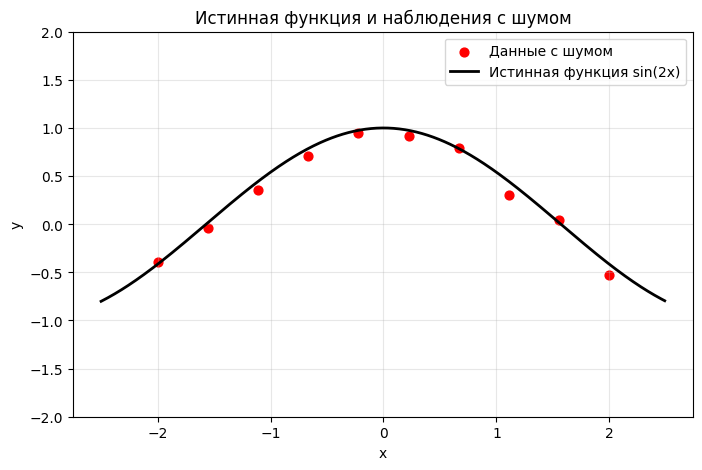

In [3]:
plt.figure(figsize=(8, 5))

# Отображаем точки с шумом
plt.scatter(x_points, y_points, color='red', s=40, label='Данные с шумом')

# Рисуем исходную функцию
plt.plot(x_plot, true_function(x_plot), color='black', linewidth=2, label='Истинная функция sin(2x)')

# Настройки графика
plt.title("Истинная функция и наблюдения с шумом")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-2, 2)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Обучение полиномиальной модели

Мы хотим обучить модель, которая аппроксимирует данные с шумом функцией вида:


$$y \approx \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_d x^d$$
Для каждой точки x создаём новые признаки: \(x, x^2, x^3, ..., x^d\).  
Эти признаки позволяют линейной модели учить нелинейные зависимости.


In [4]:
degree = 3

# Создаём объект PolynomialFeatures
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Преобразуем точки для обучения
X = poly.fit_transform(x_points.reshape(-1, 1))

# Для сетки предсказаний
X_plot = poly.transform(x_plot.reshape(-1, 1))

print("Пример полиномиальных признаков для точек обучения:")
print(X)


Пример полиномиальных признаков для точек обучения:
[[-2.          4.         -8.        ]
 [-1.55555556  2.41975309 -3.76406036]
 [-1.11111111  1.2345679  -1.37174211]
 [-0.66666667  0.44444444 -0.2962963 ]
 [-0.22222222  0.04938272 -0.01097394]
 [ 0.22222222  0.04938272  0.01097394]
 [ 0.66666667  0.44444444  0.2962963 ]
 [ 1.11111111  1.2345679   1.37174211]
 [ 1.55555556  2.41975309  3.76406036]
 [ 2.          4.          8.        ]]


Теперь у нас есть "линейная" модель по полиномиальным признакам.  
LinearRegression научится находить коэффициенты \(\beta_1, \beta_2, ...\)


In [5]:
# Создаём и обучаем модель
model = LinearRegression(fit_intercept=True)
model.fit(X, y_points)

# Посмотрим коэффициенты
print("Intercept (β0):", model.intercept_)
print("Коэффициенты (β1..βd):", model.coef_)


Intercept (β0): 0.8785013710431191
Коэффициенты (β1..βd): [ 0.03755512 -0.3485068  -0.01624866]


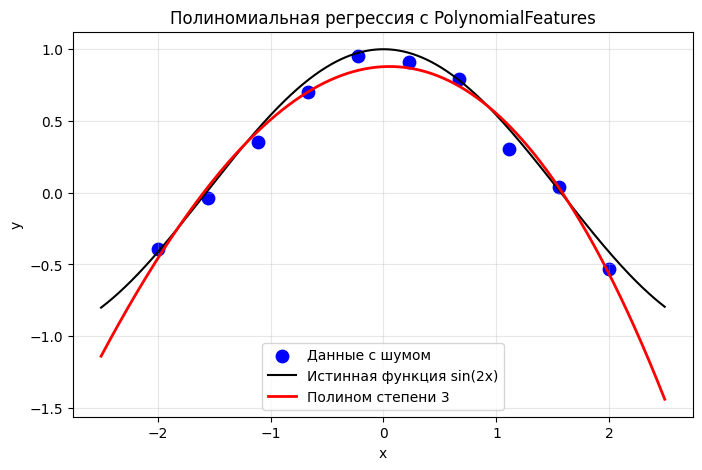

In [6]:
y_pred = model.predict(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(x_points, y_points, color='blue', s=80, label='Данные с шумом')
plt.plot(x_plot, true_function(x_plot), color='black', linewidth=1.5, label='Истинная функция sin(2x)')
plt.plot(x_plot, y_pred, color='red', linewidth=2, label=f'Полином степени {degree}')
plt.title("Полиномиальная регрессия с PolynomialFeatures")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Недообучение и переобучение

In [7]:
def polynomial_prediction(x_train, y_train, x_eval, degree):
    """
    Обучает полиномиальную линейную модель и возвращает предсказания на x_eval.
    
    Параметры:
    - x_train: массив обучающих x, shape (n_samples,)
    - y_train: массив целевых y, shape (n_samples,)
    - x_eval: массив точек для предсказаний
    - degree: степень полинома
    
    Возвращает:
    - y_pred: предсказанные значения на x_eval
    """
    # Создаём полиномиальные признаки
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_eval_poly = poly.transform(x_eval.reshape(-1, 1))
    
    # Обучаем линейную модель
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_poly, y_train)
    return model.predict(X_eval_poly)


In [8]:
degree_under = 1
y_pred_under = polynomial_prediction(x_points, y_points, x_plot, degree_under)
degree_over = 9
y_pred_over = polynomial_prediction(x_points, y_points, x_plot, degree_over)

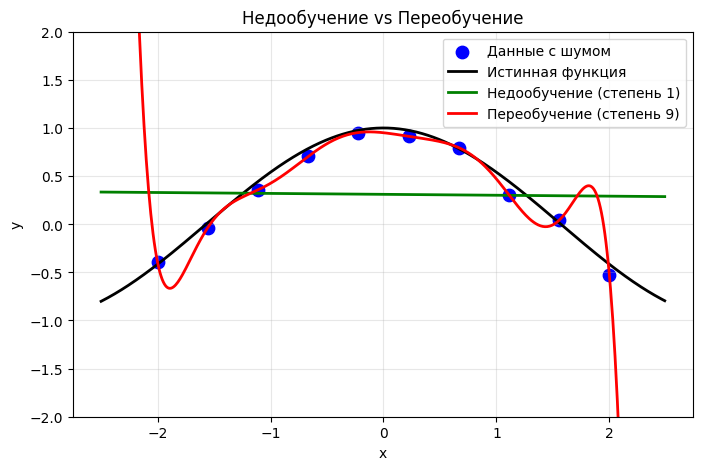

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(x_points, y_points, color='blue', s=80, label='Данные с шумом')
plt.plot(x_plot, true_function(x_plot), color='black', linewidth=2, label='Истинная функция')
plt.plot(x_plot, y_pred_under, color='green', linewidth=2, label=f'Недообучение (степень {degree_under})')
plt.plot(x_plot, y_pred_over, color='red', linewidth=2, label=f'Переобучение (степень {degree_over})')

plt.title("Недообучение vs Переобучение")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-2, 2)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Упражнение:** выведите результаты регрессии для промежуточных степеней и MSE.

Степень 1: MSE=0.2566, R2=0.0006
Степень 2: MSE=0.0064, R2=0.9752
Степень 3: MSE=0.0057, R2=0.9776
Степень 4: MSE=0.0022, R2=0.9913
Степень 5: MSE=0.0021, R2=0.9920
Степень 6: MSE=0.0013, R2=0.9948
Степень 7: MSE=0.0009, R2=0.9964
Степень 8: MSE=0.0005, R2=0.9981
Степень 9: MSE=0.0000, R2=1.0000


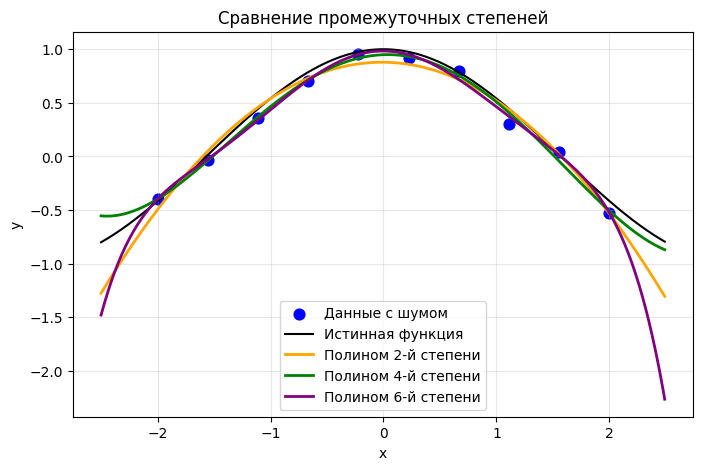

In [10]:
degrees_to_check = range(1, 10)

results = []
for d in degrees_to_check:
    y_pred_train = polynomial_prediction(x_points, y_points, x_points, d)
    mse = mean_squared_error(y_points, y_pred_train)
    r2 = r2_score(y_points, y_pred_train)
    results.append((d, mse, r2))

for d, mse, r2 in results:
    print(f"Степень {d}: MSE={mse:.4f}, R2={r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(x_points, y_points, color="blue", s=60, label="Данные с шумом")
plt.plot(x_plot, true_function(x_plot), color="black", linewidth=1.5, label="Истинная функция")
for d, color in zip([2,4,6], ["orange", "green", "purple"]):
    y_pred_mid = polynomial_prediction(x_points, y_points, x_plot, d)
    plt.plot(x_plot, y_pred_mid, color=color, linewidth=2, label=f"Полином {d}-й степени")
plt.legend()
plt.title("Сравнение промежуточных степеней")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()


### Регуляризация

In [11]:
degree = 9
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_points = poly.fit_transform(x_points.reshape(-1, 1))
X_plot = poly.transform(x_plot.reshape(-1, 1))


In [12]:
# Без регуляризации
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_points, y_points)
y_pred_lr = model_lr.predict(X_plot)

# Ridge
model_ridge = Ridge(alpha=1.0, fit_intercept=True)
model_ridge.fit(X_points, y_points)
y_pred_ridge = model_ridge.predict(X_plot)

# Lasso
model_lasso = Lasso(alpha=0.01, max_iter=10000)
model_lasso.fit(X_points, y_points)
y_pred_lasso = model_lasso.predict(X_plot)


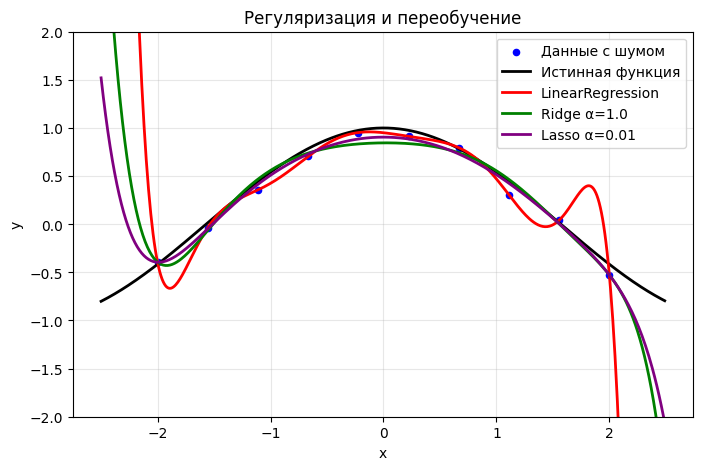

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(x_points, y_points, color='blue', s=20, label='Данные с шумом')
plt.plot(x_plot, true_function(x_plot), color='black', linewidth=2, label='Истинная функция')
plt.plot(x_plot, y_pred_lr, color='red', linewidth=2, label='LinearRegression')
plt.plot(x_plot, y_pred_ridge, color='green', linewidth=2, label='Ridge α=1.0')
plt.plot(x_plot, y_pred_lasso, color='purple', linewidth=2, label='Lasso α=0.01')
plt.title("Регуляризация и переобучение")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-2, 2)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [14]:
x = np.linspace(0, 10, 15)
n = len(x)
# Создаём сильную коллинеарность: второй признак почти полностью дублирует первый
X = np.column_stack([
    x,
    x + np.random.normal(0, 0.05, n)  # очень маленький шум
])

# Целевая переменная: линейная комбинация + шум
y = 2*X[:,0] + 3*X[:,1] + np.random.normal(0, 5, n)  # добавлен сильный шум

# Сетка для графика
x_plot = np.linspace(0, 10, 200)
X_plot = np.column_stack([
    x_plot,
    x_plot + 0.05*np.sin(x_plot)
])


Коэффициенты:
LinearRegression: [ 21.86236477 -16.18971622]
Ridge: [3.11867408 2.65570715]
Lasso: [5.76829933 0.        ]


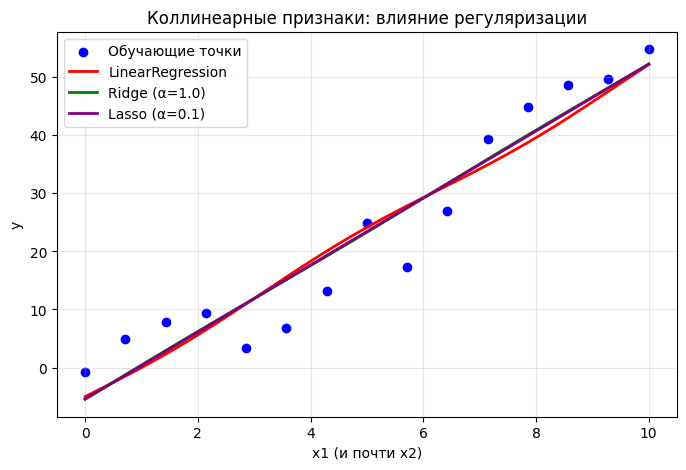

In [15]:
# Модели на данных с коллинеарностью
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X, y)

print("Коэффициенты:")
for name, model in [("LinearRegression", lr), ("Ridge", ridge), ("Lasso", lasso)]:
    print(f"{name}: {model.coef_}")

y_lr = lr.predict(X_plot)
y_ridge = ridge.predict(X_plot)
y_lasso = lasso.predict(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Обучающие точки")
plt.plot(x_plot, y_lr, color="red", linewidth=2, label="LinearRegression")
plt.plot(x_plot, y_ridge, color="green", linewidth=2, label="Ridge (α=1.0)")
plt.plot(x_plot, y_lasso, color="purple", linewidth=2, label="Lasso (α=0.1)")
plt.title("Коллинеарные признаки: влияние регуляризации")
plt.xlabel("x1 (и почти x2)")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Творческое задание (без оценки)


Полученные умения можно применить на реальных данных.

### 🌀 Airfoil Self-Noise (Аэродинамика)
**Задача:** предсказать уровень звукового давления по аэродинамическим параметрам.  

In [16]:
#!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat
#df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)
#X, y = df.iloc[:,:-1], df.iloc[:,-1]

### 🧱 Concrete Compressive Strength (Строительные материалы)
**Задача**: предсказать прочность бетона на сжатие составу и возрасту образца.

In [17]:
#curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
#import pandas as pd
#df = pd.read_excel("Concrete_Data.xls")